In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plt2latex as p2l

from scipy.fft import fft, fftfreq

In [124]:
df = pd.read_csv('data/scope_17.csv')
df.index += -1
df = df.drop(labels = -1, axis = 0)

In [125]:
df['x-axis'] = df['x-axis'].astype('float')
df['1'] = df['1'].astype('float')
df['2'] = df['2'].astype('float')

In [126]:
n = 1
df = df[0:60000:n]
df.index /= n
df.index = df.index.astype("int")
x = np.array(df['x-axis'])
y = np.array(df['2'])
df.head()

,x-axis,1,2
0,0.053200,4.305149,0.005647
1,0.053202,4.490077,0.001788
2,0.053203,4.305149,-0.004162
3,0.053205,4.297111,-0.012122
4,0.053206,4.490077,-0.016303


0.053200
0.145110

In [127]:
# plt.plot(df['x-axis'], df['1'])

In [128]:
# plt.plot(x, y)

60000 652810.8790671872


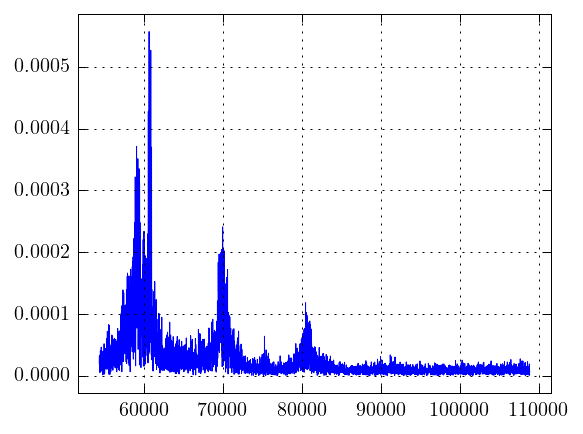

In [144]:
N = df.index[-1] + 1
Fs = N / (df['x-axis'][df.index[-1]] - df['x-axis'][df.index[0]])
tstep = 1 / Fs

print(N, Fs)

fstep = Fs / N
f = np.linspace(0, (N-1)*fstep, N)

X = np.fft.fft(y)
X_mag = np.abs(X)/N

a = 50000
b = 100000
a //= 10
b //= 10
plt.plot(f[a:b], X_mag[a:b])
# plt.axvline(x = 76, color = 'r')

1


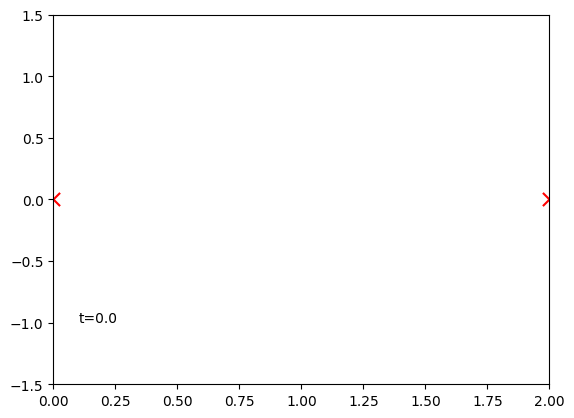

In [2]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

import LinearPDESolvers as linPDEs


import time
#solve wave eq

T=4
xLeft=0
xRight=2
c=2

#Nx = 510
#Nt = 1000
Nx=20
Nt=200
hx = (xRight-xLeft)/Nx
ht = T/Nt


solver = linPDEs.ExplicitEulerSolver(np.array([ht,hx]), cCoef=c)


xs = np.arange(xLeft,xRight+hx/2,hx)
ts = np.arange(0,T+ht/2,ht)

#assume u'(0,x)=0
def initFunc(xx):
    return ((2*xx)*(xx<0.5) + (xx>=0.5)*(-2/3*xx + 4/3))
def dtFunc(xx):
    return 0
uInits = np.zeros([2,len(xs)])
uInits[0,:] = initFunc(xs)
duts = dtFunc(xs)
uInits[1,:] = uInits[0,:] + duts*ht

#SOLVE!
res=solver.solveBVProblem1D(uInits, Nt)


# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(xLeft, xRight), 
                ylim =(-1.5, 1.5)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 

cross = axis.scatter([xLeft,xRight],[0,0], marker="x", s=90, color="red")

txt = axis.text(xLeft+1e-1,-1,"t="+str(ht*0))
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data(xs, res[0,:])
    txt.set_text("t="+str(ht*0))
    return line,txt,
   
def animate(i):
    line.set_data(xs, res[i,:])
    txt.set_text("t={:.2f}".format(ht*i) )
    return line,txt,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = np.arange(0,res.shape[0],1), interval = ht*1000, blit = False, repeat=False)#ms scale

# anim.save('explEuler.mp4',fps=30)

# with open("./solveTempOut.pkl", "wb") as f:
#     pickle.dump({"res": res},f)

plt.show()

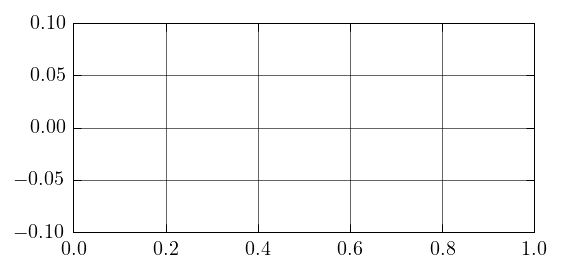

In [3]:
from numpy import sin, cos, sqrt, exp, pi
from scipy.special import erfi
import numpy as np
import plt2latex


plt.rcParams["animation.html"] = "jshtml"


def f(t, x, m, w):
	omega = sqrt((-1*beta+pi**2*rho*T*m**2/l/l)/rho/rho)
	value = (12*exp(-1*beta*t/rho) * l**4 *
		(4 - 4*(-1)**m + (-1)**m * pi ** 2*m**2) *
		sin(pi*x*m/l)*
		(2*beta*exp(beta*t/rho)*l**4*rho*w*cos(w*t)*omega-
			2*beta*l**4*rho*w*cos(t*omega)*omega+
			l**2*(exp(beta*t/rho)*rho*(l**2*rho*w**2-pi**2*T*m**2)*omega
				*sin(w*t) +
				w*(-2*beta**2*l**2 - rho*(l**2*rho*w**2-pi**2*T*m**2)) *
				sin(t*omega)
			)
		)	
	)/(
		pi**5*rho*m**5*omega*(4*beta**2*l**4*w**2 +
			(l**2*rho*w**2 - pi**2*T*m**2)**2)
	)
	return value


#def f(t, x, m, w):
#	omega = sqrt((-1*beta+pi**2*rho*T*m**2/l/l)/rho/rho)
#	value = (np.exp(-beta*t/rho-(np.pi*m*(2j*l*w+a*a*np.pi*m))/(2*l*l))*
#		((np.exp(2*1j*np.pi* w*m/l)*
#			(erfi(1j*l*(l-w)+a*a*np.pi*m/(np.sqrt(2)*a*l))-
#			erfi(-1j*l*w+a*a*np.pi*m/(np.sqrt(2)*a*l)))-
#		erfi(1j*l*w+a*a*np.pi*m/(np.sqrt(2)*a*l))+
#		erfi(1j*l*(-l+w)+a*a*np.pi*m/(np.sqrt(2)*a*l)))*sin(pi*m*x/l)*
#		(2*beta*exp(beta*t/rho)*l**4*rho*w*cos(w*t)*omega-
#		2*beta*l**4*rho*w*cos(t*omega)*omega+
#		l**2*(exp(beta*t/rho)*rho*(l**2*rho*w**2-pi**2*T*m**2)*omega
#		*sin(w*t) +
#		w*(-2*beta**2*l**2 - rho*(l**2*rho*w**2-pi**2*T*m**2)) *
#		sin(t*omega)))
#		)) / (
#			(2*l*rho*omega)*(4*beta**2*l**4*w**2+(l**2*rho*w**2-pi**2*T*m**2)**2)
#		)
#	return(value)
	
	
l = 1
rho = 0.01
beta = 0.01
T = 10
a = 0.2

def rope(t, x, w):
	value = 0
	for i in range(1, 100):
		value += f(t, x, i, w)
		return value
	

from matplotlib import pyplot as plt
x = np.linspace(0, 1, 10)
t = np.linspace(1, 50, 1000)
w = np.linspace(20, 500, 100)




def maxim(w):
	data = []
	for ww in w:
		# print(str(int(ww/max(w)*100))  +  "%")
		value = 0
		for tt in t:
			for xx in x:
				temp = rope(tt, xx, ww)
				if temp > value:
					value = temp
		data.append(value)
	return data

				
			
			
	

# plt.plot(w, maxim(w))
# plt.show()





import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

plt.rcParams["figure.figsize"] = [4, 2]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.1, 0.1))
line, = ax.plot([], [], lw=2)
time_text = ax.text(0.05, 0.9, '')

def init():
	line.set_data([], [])
#	time_text = ax.text(0.05, 0.9, '')
	return line,

def animate(i):
	x = np.linspace(0, 1, 100)
	w = 90 + i/100
	y = rope(i/250, x, w)
	line.set_data(x, y)
	# print(i/100+90)
#	time_text.set_text(str(w))
	return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2000, interval=20, blit=True)
plt.show()

In [4]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

x= np.linspace(0,10,100)
def animate(t):
    plt.cla()
    plt.plot(x-t,x)
    plt.xlim(0,10)

matplotlib.animation.FuncAnimation(fig, animate, frames=10)